# COURSE PROJECT -- L LARKIN

## Eliminate AcctID duplicates in Building dataset before merging into Parcel dataset
    # We are interested in single residence lots (parcels). Therefore, need to eliminate parcels with multiple
    # structures in them.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.formula.api as smf

In [2]:
# Load Building dataset (MontBldg.csv) with headers
location = "Datasets/Bldg (MontBldg-Mod).csv"
df = pd.read_csv(location)
df.head(15)

,ACCTID,DIGXCORD,DIGYCORD,BL_BLDNUMB,BL_BLDTYPE,BL_DSCTYPE,BL_BLDSTYL,BL_DSCSTYL,BL_ENCSQFT
0,160100000396,385707.8,174220.7,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1168
1,160100001471,386450.1,171085.2,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,960
2,160100001631,385511.5,178496.3,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1160
3,160100002258,389028.6,176606.9,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1430
4,160100002783,388874.7,173240.0,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1392
5,160100003435,385511.5,178591.4,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1568
6,160100003845,390510.8,171011.7,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1323
7,160100006303,385365.5,169190.9,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1056
8,160100007397,387718.1,164622.5,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1220
9,160100007865,389518.7,166275.0,R0001,4,DWEL Split Foyer,13,STRY Split Foyer,1421


In [3]:
df.tail(3)

,ACCTID,DIGXCORD,DIGYCORD,BL_BLDNUMB,BL_BLDTYPE,BL_DSCTYPE,BL_BLDSTYL,BL_DSCSTYL,BL_ENCSQFT
181539,161303714268,398594.2,149415.4,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1749
181540,161303714510,393059.6,158599.6,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,3284
181541,161303719330,391919.5,150551.3,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1188


In [4]:
# Check the size of the dataset
df.shape

(181542, 9)

In [5]:
# Check number types
df.dtypes

ACCTID          int64
DIGXCORD      float64
DIGYCORD      float64
BL_BLDNUMB     object
BL_BLDTYPE      int64
BL_DSCTYPE     object
BL_BLDSTYL      int64
BL_DSCSTYL     object
BL_ENCSQFT      int64
dtype: object

In [6]:
# Check for entries having the same Account ID (ACCTID)
#df.loc[df.duplicated('ACCTID')]
df.duplicated('ACCTID')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
181512    False
181513    False
181514    False
181515    False
181516    False
181517    False
181518    False
181519    False
181520    False
181521    False
181522    False
181523    False
181524    False
181525    False
181526    False
181527    False
181528    False
181529    False
181530    False
181531    False
181532    False
181533    False
181534    False
181535    False
181536    False
181537    False
181538    False
181539    False
181540    False
181541    False
Length: 181542, dtype: b

In [7]:
# Get rid of all duplicates
df_deduped=df.drop_duplicates(['ACCTID'], keep=False)

In [8]:
df_deduped.shape

(180639, 9)

In [9]:
df_deduped.tail(10)

,ACCTID,DIGXCORD,DIGYCORD,BL_BLDNUMB,BL_BLDTYPE,BL_DSCTYPE,BL_BLDSTYL,BL_DSCSTYL,BL_ENCSQFT
181532,161303681407,394707.4,158191.1,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1445
181533,161303682413,394478.5,151858.4,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1211
181534,161303683703,394328.2,151916.7,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,2940
181535,161303687916,393708.6,150182.6,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,3974
181536,161303687927,393693.5,150188.1,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,3964
181537,161303688352,396813.8,156600.2,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,4327
181538,161303695448,398154.9,148718.1,R0001,1,DWEL Standard Unit,2,STRY 1 Story With Basement,2871
181539,161303714268,398594.2,149415.4,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1749
181540,161303714510,393059.6,158599.6,R0001,1,DWEL Standard Unit,6,STRY 2 Story With Basement,3284
181541,161303719330,391919.5,150551.3,R0001,1,DWEL Standard Unit,4,STRY 1 1/2 Story With Basement,1188


In [10]:
# Verify all duplicates have been removed
df_deduped.duplicated('ACCTID')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
181512    False
181513    False
181514    False
181515    False
181516    False
181517    False
181518    False
181519    False
181520    False
181521    False
181522    False
181523    False
181524    False
181525    False
181526    False
181527    False
181528    False
181529    False
181530    False
181531    False
181532    False
181533    False
181534    False
181535    False
181536    False
181537    False
181538    False
181539    False
181540    False
181541    False
Length: 180639, dtype: b

In [11]:
df_deduped.shape

(180639, 9)

In [12]:
# Delete unneeded columns
df_reduced=df_deduped.drop(['DIGXCORD','DIGYCORD','BL_BLDNUMB','BL_BLDTYPE','BL_DSCTYPE', 'BL_BLDSTYL', 'BL_DSCSTYL'], axis=1)

In [13]:
df_reduced.shape

(180639, 2)

In [14]:
# Make ACCTID the index column in order for the dataframe merge operations will work
df_reduced.set_index('ACCTID', inplace=True)

In [15]:
df_reduced.head(3)

,BL_ENCSQFT
ACCTID,
160100000396,1168
160100001471,960
160100001631,1160


In [16]:
df_reduced.tail(3)

,BL_ENCSQFT
ACCTID,
161303714268,1749
161303714510,3284
161303719330,1188


In [17]:
df_reduced.dtypes

BL_ENCSQFT    int64
dtype: object

In [18]:
df_reduced.duplicated().sum()

174076

# Combine Building and Parcel datasets to create Master dataset for analysis

In [19]:
# Load Parcel dataset (Parcel_Mont2013-Anal.csv) with headers
location1 = "Datasets/Parcel (Mont2013-Anal).csv"
left = pd.read_csv(location1)
left.shape

(108233, 29)

In [20]:
left.columns

Index(['ACCTID', 'DIGXCORD', 'DIGYCORD', 'ADDRESS', 'STRTNUM', 'STRTDIR',
       'STRTNAM', 'STRTTYP', 'STRTSFX', 'CITY', 'ZIPCODE', 'SUBDIVSN',
       'DESCSUBD', 'ACRES', 'YEARBLT', 'SQFTSTRC', 'STRUSTYL', 'DESCSTYL',
       'STORIES', 'BASEMENT', 'STRUBLDG', 'TRADATE', 'YEAR', 'MONTH', 'DAY',
       'DATECODE', 'CALDATE', 'CONSIDR1', 'CONSID_2019USD'],
      dtype='object')

In [21]:
left.set_index('ACCTID', inplace=True)

In [22]:
left.head(3)

,DIGXCORD,DIGYCORD,ADDRESS,STRTNUM,STRTDIR,STRTNAM,STRTTYP,STRTSFX,CITY,ZIPCODE,...,BASEMENT,STRUBLDG,TRADATE,YEAR,MONTH,DAY,DATECODE,CALDATE,CONSIDR1,CONSID_2019USD
ACCTID,,,,,,,,,,,,,,,,,,,,,
160400176052,387741.7,156009.2,1029 WELSH DR,1029,NaN,WELSH,DR,NaN,ROCKVILLE,20852,...,1,4,20160222,2016,2,22,42422,2/22/2016,190000,201400
160500339647,400974.7,155359.9,12806 BROADMORE ROAD,12806,NaN,BROADMORE,ROAD,NaN,SILVER SPRING,20904,...,1,4,20160202,2016,2,2,42402,2/2/2016,220000,233200
160900766926,379176.2,167448.8,19401 ARCHDALE ROAD,19401,NaN,ARCHDALE,ROAD,NaN,GERMANTOWN,20876,...,1,4,20160307,2016,3,7,42436,3/7/2016,267500,283550


In [23]:
left.shape

(108233, 28)

In [24]:
# Join the two datasets to get master data set containing all data for analysis
main =left.merge(df_reduced, on='ACCTID', how='left')
main

,DIGXCORD,DIGYCORD,ADDRESS,STRTNUM,STRTDIR,STRTNAM,STRTTYP,STRTSFX,CITY,ZIPCODE,...,STRUBLDG,TRADATE,YEAR,MONTH,DAY,DATECODE,CALDATE,CONSIDR1,CONSID_2019USD,BL_ENCSQFT
ACCTID,,,,,,,,,,,,,,,,,,,,,
160400176052,387741.7,156009.2,1029 WELSH DR,1029,NaN,WELSH,DR,NaN,ROCKVILLE,20852,...,4,20160222,2016,2,22,42422,2/22/2016,190000,201400,1030.0
160500339647,400974.7,155359.9,12806 BROADMORE ROAD,12806,NaN,BROADMORE,ROAD,NaN,SILVER SPRING,20904,...,4,20160202,2016,2,2,42402,2/2/2016,220000,233200,1381.0
160900766926,379176.2,167448.8,19401 ARCHDALE ROAD,19401,NaN,ARCHDALE,ROAD,NaN,GERMANTOWN,20876,...,4,20160307,2016,3,7,42436,3/7/2016,267500,283550,1034.0
160500373338,400450.1,155765.5,808 CANNON ROAD,808,NaN,CANNON,ROAD,NaN,SILVER SPRING,20904,...,4,20160309,2016,3,9,42438,3/9/2016,290000,307400,1290.0
160901754855,385966.9,165211.3,18307 QUONDAL CT,18307,NaN,QUONDAL,CT,NaN,GAITHERSBURG,20877,...,4,20160205,2016,2,5,42405,2/5/2016,292500,310050,820.0
160900815413,379067.2,166821.8,19104 STALEYBRIDGE ROAD,19104,NaN,STALEYBRIDGE,ROAD,NaN,GERMANTOWN,20876,...,4,20160205,2016,2,5,42405,2/5/2016,295000,312700,820.0
160902023968,386339.5,165260.1,7 SWAN STREAM CT,7,NaN,SWAN STREAM,CT,NaN,GAITHERSBURG,20877,...,4,20160407,2016,4,7,42467,4/7/2016,310000,328600,1074.0
160900815388,379006.9,167051.9,19225 STALEYBRIDGE ROAD,19225,NaN,STALEYBRIDGE,ROAD,NaN,GERMANTOWN,20876,...,4,20160217,2016,2,17,42417,2/17/2016,310000,328600,1026.0
160902264532,378899.6,170207.0,20808 DOXDAM WAY,20808,NaN,DOXDAM,WAY,NaN,GERMANTOWN,20876,...,4,20160205,2016,2,5,42405,2/5/2016,310000,328600,929.0


In [25]:
main.shape

(108233, 29)

In [26]:
main.dtypes

DIGXCORD          float64
DIGYCORD          float64
ADDRESS            object
STRTNUM             int64
STRTDIR            object
STRTNAM            object
STRTTYP            object
STRTSFX            object
CITY               object
ZIPCODE             int64
SUBDIVSN            int64
DESCSUBD           object
ACRES             float64
YEARBLT           float64
SQFTSTRC            int64
STRUSTYL            int64
DESCSTYL           object
STORIES           float64
BASEMENT            int64
STRUBLDG            int64
TRADATE             int64
YEAR                int64
MONTH               int64
DAY                 int64
DATECODE            int64
CALDATE            object
CONSIDR1            int64
CONSID_2019USD      int64
BL_ENCSQFT        float64
dtype: object

In [27]:
main.columns

Index(['DIGXCORD', 'DIGYCORD', 'ADDRESS', 'STRTNUM', 'STRTDIR', 'STRTNAM',
       'STRTTYP', 'STRTSFX', 'CITY', 'ZIPCODE', 'SUBDIVSN', 'DESCSUBD',
       'ACRES', 'YEARBLT', 'SQFTSTRC', 'STRUSTYL', 'DESCSTYL', 'STORIES',
       'BASEMENT', 'STRUBLDG', 'TRADATE', 'YEAR', 'MONTH', 'DAY', 'DATECODE',
       'CALDATE', 'CONSIDR1', 'CONSID_2019USD', 'BL_ENCSQFT'],
      dtype='object')

In [28]:
main.isnull().sum()

DIGXCORD               0
DIGYCORD               0
ADDRESS                0
STRTNUM                0
STRTDIR           106846
STRTNAM                0
STRTTYP              228
STRTSFX           107980
CITY                   0
ZIPCODE                0
SUBDIVSN               0
DESCSUBD               0
ACRES                  0
YEARBLT               48
SQFTSTRC               0
STRUSTYL               0
DESCSTYL               0
STORIES                0
BASEMENT               0
STRUBLDG               0
TRADATE                0
YEAR                   0
MONTH                  0
DAY                    0
DATECODE               0
CALDATE                0
CONSIDR1               0
CONSID_2019USD         0
BL_ENCSQFT          1550
dtype: int64

In [29]:
#Save Main dataset in Excel format to do a visual inspection
#main.to_csv('Datasets/Main.csv')

## Convert subdivision names from text to numerical code for analysis

In [30]:
#Create copy of main dataset for further manipulation
df = main

In [31]:
df.head()

,DIGXCORD,DIGYCORD,ADDRESS,STRTNUM,STRTDIR,STRTNAM,STRTTYP,STRTSFX,CITY,ZIPCODE,...,STRUBLDG,TRADATE,YEAR,MONTH,DAY,DATECODE,CALDATE,CONSIDR1,CONSID_2019USD,BL_ENCSQFT
ACCTID,,,,,,,,,,,,,,,,,,,,,
160400176052,387741.7,156009.2,1029 WELSH DR,1029,NaN,WELSH,DR,NaN,ROCKVILLE,20852,...,4,20160222,2016,2,22,42422,2/22/2016,190000,201400,1030.0
160500339647,400974.7,155359.9,12806 BROADMORE ROAD,12806,NaN,BROADMORE,ROAD,NaN,SILVER SPRING,20904,...,4,20160202,2016,2,2,42402,2/2/2016,220000,233200,1381.0
160900766926,379176.2,167448.8,19401 ARCHDALE ROAD,19401,NaN,ARCHDALE,ROAD,NaN,GERMANTOWN,20876,...,4,20160307,2016,3,7,42436,3/7/2016,267500,283550,1034.0
160500373338,400450.1,155765.5,808 CANNON ROAD,808,NaN,CANNON,ROAD,NaN,SILVER SPRING,20904,...,4,20160309,2016,3,9,42438,3/9/2016,290000,307400,1290.0
160901754855,385966.9,165211.3,18307 QUONDAL CT,18307,NaN,QUONDAL,CT,NaN,GAITHERSBURG,20877,...,4,20160205,2016,2,5,42405,2/5/2016,292500,310050,820.0


In [32]:
df.columns

Index(['DIGXCORD', 'DIGYCORD', 'ADDRESS', 'STRTNUM', 'STRTDIR', 'STRTNAM',
       'STRTTYP', 'STRTSFX', 'CITY', 'ZIPCODE', 'SUBDIVSN', 'DESCSUBD',
       'ACRES', 'YEARBLT', 'SQFTSTRC', 'STRUSTYL', 'DESCSTYL', 'STORIES',
       'BASEMENT', 'STRUBLDG', 'TRADATE', 'YEAR', 'MONTH', 'DAY', 'DATECODE',
       'CALDATE', 'CONSIDR1', 'CONSID_2019USD', 'BL_ENCSQFT'],
      dtype='object')

In [33]:
#The names of the subdivisions (DESCSUBD) is a text string; need to convert to numerical values for analysis
df['DESCSUBD'].head()

ACCTID
160400176052          HUNGERFORD
160500339647    FAIRVIEW ESTATES
160900766926          FOX CHAPEL
160500373338       BUCKLEY DOWNS
160901754855    EMORY GROVE PARK
Name: DESCSUBD, dtype: object

In [34]:
#Create list that contains the unique subdivision names
DESCSUBD_unique = df['DESCSUBD'].unique()

In [35]:
len(DESCSUBD_unique)

960

In [36]:
DESCSUBD_unique = list(DESCSUBD_unique)

In [37]:
for subdiv in DESCSUBD_unique:
    print(DESCSUBD_unique.index(subdiv))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [38]:
#Initialize dictionary containing subdivision text name and numeric value pairs
DESCSUBD_unique_dict = {}

In [39]:
#Associate the index number with the text name
for subdivision in DESCSUBD_unique:
    DESCSUBD_unique_dict[subdivision]=DESCSUBD_unique.index(subdivision)

In [40]:
DESCSUBD_unique_dict

{'HUNGERFORD': 0,
 'FAIRVIEW ESTATES': 1,
 'FOX CHAPEL': 2,
 'BUCKLEY DOWNS': 3,
 'EMORY GROVE PARK': 4,
 'WEXFORD': 5,
 'CHARLENE': 6,
 'QUAIL VALLEY': 7,
 'SWEEPSTAKES': 8,
 'BROOKHAVEN': 9,
 'THE PLANTATIONS': 10,
 'WHEATON OUTSIDE RESIDENCES 2': 11,
 'SADDLE CREEK': 12,
 'MANOR WOODS': 13,
 'MINERAL SPRING VILLAGE': 14,
 'BEL PRE WOODS': 15,
 'WINTERS RUN': 16,
 'WESMOND': 17,
 'ASPEN HILL PARK': 18,
 'SPRINGBROOK VILLA': 19,
 'KEMP MILL ESTATES': 20,
 'ROYAL VIEW': 21,
 'GREENWOOD KNOLLS': 22,
 'HARMONY HILLS': 23,
 'GOOD HOPE ESTATES': 24,
 'MONTROSE PARK': 25,
 'SHARON WOODS': 26,
 'DAMASCUS OUTSIDE': 27,
 'BURGUNDY ESTATES': 28,
 'BLUERIDGE MANOR': 29,
 'SPRINGBROOK TERRACE': 30,
 'HALPINE VILLAGE': 31,
 'EAST SPRINGBROOK': 32,
 'FOREST GLEN KNOLLS': 33,
 'WASHINGTONIAN VILLAGE': 34,
 'QUINCE ORCHARD MANOR': 35,
 'ENGLISH MANOR': 36,
 'QUINCE ORCHARD KNOLLS': 37,
 'CAPITOL VIEW PARK': 38,
 'NEW MARK COMMONS': 39,
 'SHERWOOD FOREST MANOR': 40,
 'WESTLEIGH': 41,
 'ROCKSHIRE': 42,

In [41]:
df['SUBDCODE'] = df['DESCSUBD'].map(DESCSUBD_unique_dict)

In [42]:
print(df[['DESCSUBD','SUBDCODE']])

                                  DESCSUBD  SUBDCODE
ACCTID                                              
160400176052                    HUNGERFORD         0
160500339647              FAIRVIEW ESTATES         1
160900766926                    FOX CHAPEL         2
160500373338                 BUCKLEY DOWNS         3
160901754855              EMORY GROVE PARK         4
160900815413                    FOX CHAPEL         2
160902023968              EMORY GROVE PARK         4
160900815388                    FOX CHAPEL         2
160902264532                       WEXFORD         5
160901760617                      CHARLENE         6
160900815708                    FOX CHAPEL         2
160902064935                  QUAIL VALLEY         7
161202650412                   SWEEPSTAKES         8
160901630327                  QUAIL VALLEY         7
161301308094                    BROOKHAVEN         9
161202301657               THE PLANTATIONS        10
161300974113  WHEATON OUTSIDE RESIDENCES 2    

In [43]:
df.columns

Index(['DIGXCORD', 'DIGYCORD', 'ADDRESS', 'STRTNUM', 'STRTDIR', 'STRTNAM',
       'STRTTYP', 'STRTSFX', 'CITY', 'ZIPCODE', 'SUBDIVSN', 'DESCSUBD',
       'ACRES', 'YEARBLT', 'SQFTSTRC', 'STRUSTYL', 'DESCSTYL', 'STORIES',
       'BASEMENT', 'STRUBLDG', 'TRADATE', 'YEAR', 'MONTH', 'DAY', 'DATECODE',
       'CALDATE', 'CONSIDR1', 'CONSID_2019USD', 'BL_ENCSQFT', 'SUBDCODE'],
      dtype='object')

In [44]:
#Reset the index of the dataframe back to its default one.
#df.loc[df.duplicated('ACCTID')]
df.reset_index(inplace=True)

In [45]:
df.head()

,ACCTID,DIGXCORD,DIGYCORD,ADDRESS,STRTNUM,STRTDIR,STRTNAM,STRTTYP,STRTSFX,CITY,...,TRADATE,YEAR,MONTH,DAY,DATECODE,CALDATE,CONSIDR1,CONSID_2019USD,BL_ENCSQFT,SUBDCODE
0,160400176052,387741.7,156009.2,1029 WELSH DR,1029,NaN,WELSH,DR,NaN,ROCKVILLE,...,20160222,2016,2,22,42422,2/22/2016,190000,201400,1030.0,0
1,160500339647,400974.7,155359.9,12806 BROADMORE ROAD,12806,NaN,BROADMORE,ROAD,NaN,SILVER SPRING,...,20160202,2016,2,2,42402,2/2/2016,220000,233200,1381.0,1
2,160900766926,379176.2,167448.8,19401 ARCHDALE ROAD,19401,NaN,ARCHDALE,ROAD,NaN,GERMANTOWN,...,20160307,2016,3,7,42436,3/7/2016,267500,283550,1034.0,2
3,160500373338,400450.1,155765.5,808 CANNON ROAD,808,NaN,CANNON,ROAD,NaN,SILVER SPRING,...,20160309,2016,3,9,42438,3/9/2016,290000,307400,1290.0,3
4,160901754855,385966.9,165211.3,18307 QUONDAL CT,18307,NaN,QUONDAL,CT,NaN,GAITHERSBURG,...,20160205,2016,2,5,42405,2/5/2016,292500,310050,820.0,4


# Analysis of Data 

## Correlation Analysis

### Determine which of the variables have the highest correlation to price of the property.

In [46]:
# Make a working copy of the main dataframe which will serve as the analysis model
model = df

In [47]:
model.dtypes

ACCTID              int64
DIGXCORD          float64
DIGYCORD          float64
ADDRESS            object
STRTNUM             int64
STRTDIR            object
STRTNAM            object
STRTTYP            object
STRTSFX            object
CITY               object
ZIPCODE             int64
SUBDIVSN            int64
DESCSUBD           object
ACRES             float64
YEARBLT           float64
SQFTSTRC            int64
STRUSTYL            int64
DESCSTYL           object
STORIES           float64
BASEMENT            int64
STRUBLDG            int64
TRADATE             int64
YEAR                int64
MONTH               int64
DAY                 int64
DATECODE            int64
CALDATE            object
CONSIDR1            int64
CONSID_2019USD      int64
BL_ENCSQFT        float64
SUBDCODE            int64
dtype: object

In [48]:
# Remove columns not containing data relevant to the analysis
model.drop(['ACCTID','ADDRESS','STRTNUM','STRTDIR','STRTNAM','STRTTYP','STRTSFX','CITY','ZIPCODE','SUBDIVSN','DESCSUBD','DESCSTYL','TRADATE','YEAR','MONTH','DAY','CALDATE','CONSIDR1'], axis=1, inplace=True)

In [49]:
# Perform correlation analysis
model.corr()

,DIGXCORD,DIGYCORD,ACRES,YEARBLT,SQFTSTRC,STRUSTYL,STORIES,BASEMENT,STRUBLDG,DATECODE,CONSID_2019USD,BL_ENCSQFT,SUBDCODE
DIGXCORD,1.000000,-0.451807,-0.110286,-0.407141,-0.282129,-0.164048,-0.189814,-0.080099,0.092362,-0.008108,-0.171527,-0.287482,-0.038345
DIGYCORD,-0.451807,1.000000,0.153414,0.505932,0.093897,0.147954,0.091864,0.058585,-0.028693,-0.017897,-0.248912,0.095189,-0.203206
ACRES,-0.110286,0.153414,1.000000,0.090879,0.255451,0.015677,0.048335,0.028219,-0.056132,-0.015347,0.168575,0.254821,0.051282
YEARBLT,-0.407141,0.505932,0.090879,1.000000,0.532638,0.302952,0.348671,0.187877,-0.101792,0.012099,0.207948,0.529927,-0.012891
SQFTSTRC,-0.282129,0.093897,0.255451,0.532638,1.000000,0.280029,0.538444,0.099458,-0.177109,0.006874,0.649234,0.990558,0.162197
STRUSTYL,-0.164048,0.147954,0.015677,0.302952,0.280029,1.000000,0.328558,0.171364,0.135977,-0.026065,0.168234,0.278071,-0.081707
STORIES,-0.189814,0.091864,0.048335,0.348671,0.538444,0.328558,1.000000,-0.064997,-0.171707,-0.028370,0.303180,0.537343,0.025913
BASEMENT,-0.080099,0.058585,0.028219,0.187877,0.099458,0.171364,-0.064997,1.000000,-0.473594,-0.001177,0.126389,0.094881,-0.036329
STRUBLDG,0.092362,-0.028693,-0.056132,-0.101792,-0.177109,0.135977,-0.171707,-0.473594,1.000000,-0.009265,-0.142729,-0.171589,-0.072344
DATECODE,-0.008108,-0.017897,-0.015347,0.012099,0.006874,-0.026065,-0.028370,-0.001177,-0.009265,1.000000,0.230551,-0.018695,0.009447


In [50]:
# Get hardcopy of correlation table; save as spreadsheet
corr_table = model.corr()
corr_table.to_csv("corr_table.csv")

In [51]:
# Highest correlation with price are the foundation sq. ft. (SQFTSTRC) and the overall enclosed sq. ft. (BL_ENCSQFT) -- 
# both are 0.65. Next is no. of stories (STORIES) at 0.3. Conclusion here is that, not surprisingly, the size of the house
# is the greatest determinant of the price. The subdivision where a house is located was expected to have a much higher
# correlation than 0.21. We will focus the rest of the analysis on house size, as defined by BL_ENCSQFT and STORIES, and
# location, as defined by subdivision (SUBDCODE) and grid coordinates (DIGXCORD and DIGYCORD).

## Linear Regression Analysis

In [52]:
# Perform Ordinary-Least-Squares linear regression on the data. Given that foundation sq. ft. and overall enclosed sq. ft.
# are basically the same type of measure and are directly related, we will use only one of the variables, overall enclosed
# sq. ft. (BL_ENCSQFT).
OLS = smf.ols('CONSID_2019USD ~ BL_ENCSQFT + STORIES + SUBDCODE + DIGXCORD + DIGYCORD', data=model).fit()

In [53]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CONSID_2019USD   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 2.521e+04
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:24:15   Log-Likelihood:            -1.4905e+06
No. Observations:              106683   AIC:                         2.981e+06
Df Residuals:                  106677   BIC:                         2.981e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.482e+06   5.98e+04    108.373      0.000    6.36e+06     6.6e+06
BL_ENCSQFT   241.8568      0.944    256.075      0.000     240.006     243.708
STORIES    -4.005e+04   2148.776    -18.638      0.000   -4.43e+04   -3.58e+04
SUBDCODE      35.8449      3.775      9.495      0.000      28.445      43.244
DIGXCORD      -8.5755      0.124    -69.129      0.000      -8.819      -8.332
DIGYCORD     -19.1051      0.119   -160.902      0.000     -19.338     -18.872
==============================================================================
Omnibus:                    66044.219   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4674660.390
Skew:                           2.213   Prob(JB):                         0.00
Kurtosis:                      35.125   Cond. No.                     2.90e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Now run it without a y-intercept and compare results
OLS = smf.ols('CONSID_2019USD ~ BL_ENCSQFT + STORIES + SUBDCODE + DIGXCORD + DIGYCORD - 1', data=model).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CONSID_2019USD   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.204e+05
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:24:16   Log-Likelihood:            -1.4961e+06
No. Observations:              106683   AIC:                         2.992e+06
Df Residuals:                  106678   BIC:                         2.992e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BL_ENCSQFT   258.7729      0.981    263.671      0.000     256.849     260.696
STORIES    -2.432e+04   2258.793    -10.766      0.000   -2.87e+04   -1.99e+04
SUBDCODE     107.9769      3.915     27.578      0.000     100.303     115.651
DIGXCORD       4.3179      0.037    116.651      0.000       4.245       4.390
DIGYCORD     -10.3641      0.092   -112.886      0.000     -10.544     -10.184
==============================================================================
Omnibus:                    61324.174   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3356270.497
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      30.173   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# The analysis without a y-intercept provides a better fit (higher R-squared)

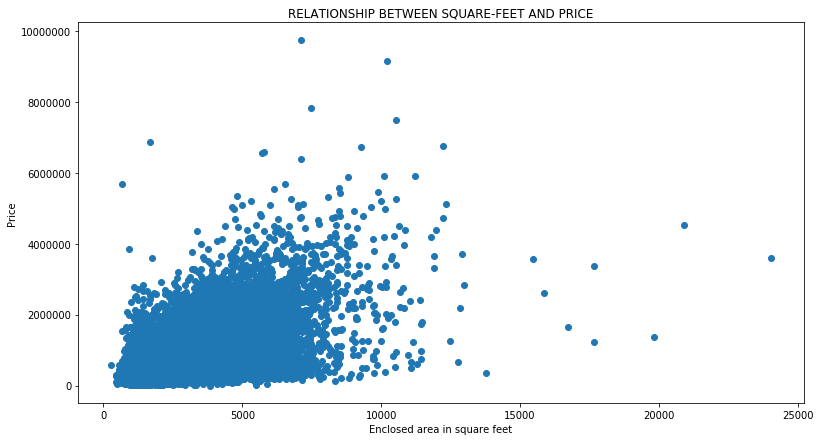

In [56]:
# Analyze the data visually by plotting BL_ENCSQFT, STORIES, SUBDCODE, DIGXCORD and DIGYCORD against PRICE

#PLOT BL_ENCSQFT vs. PRICE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['BL_ENCSQFT'], model['CONSID_2019USD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("Enclosed area in square feet")
plt.ylabel("Price")
plt.title("RELATIONSHIP BETWEEN SQUARE-FEET AND PRICE")
plt.ticklabel_format(style='plain')
plt.show()

## Very high variability in price for a given square-footage. This implies the value of square-footage is dependent on another factor -- most likely location.                                                                                                                                                                                                

#    

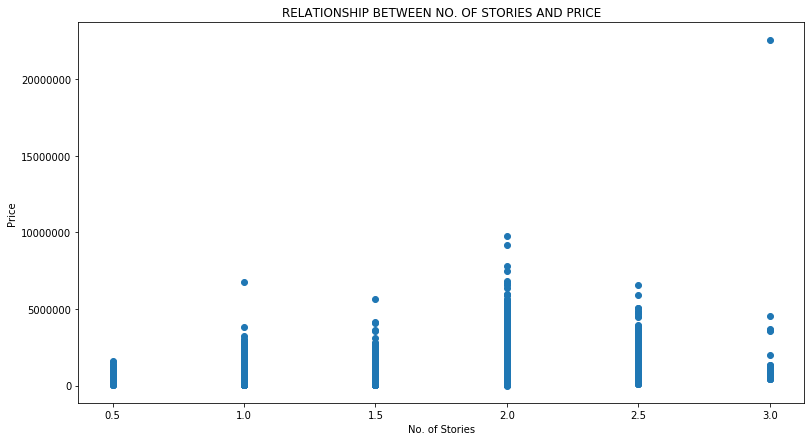

In [57]:
#PLOT STORIES vs. PRICE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['STORIES'], model['CONSID_2019USD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("No. of Stories")
plt.ylabel("Price")
plt.title("RELATIONSHIP BETWEEN NO. OF STORIES AND PRICE")
plt.ticklabel_format(style='plain')
plt.show()

## For homes of up to two stories, the data suggests that price will increase the greater the number of stories. However, this relationship reverses beyond two stories. This would seem to indicate lower demand for homes with more than two stories

#       

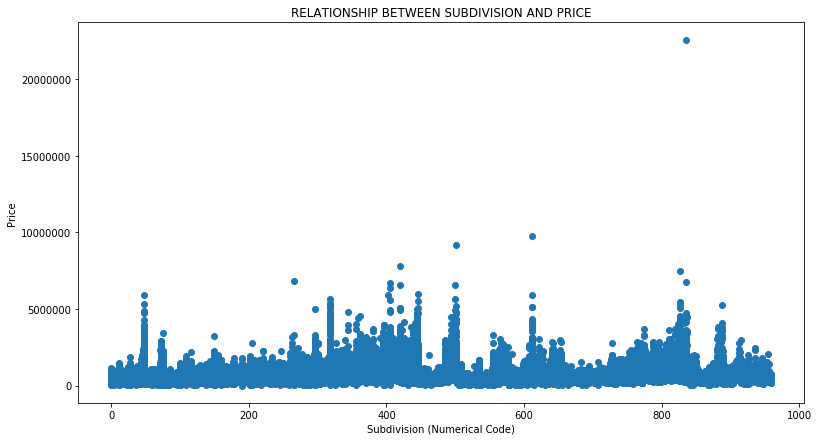

In [58]:
#PLOT SUBDIVISION vs. PRICE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['SUBDCODE'], model['CONSID_2019USD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("Subdivision (Numerical Code)")
plt.ylabel("Price")
plt.title("RELATIONSHIP BETWEEN SUBDIVISION AND PRICE")
plt.ticklabel_format(style='plain')
plt.show()

## Certain subdivisions command higher prices

#  

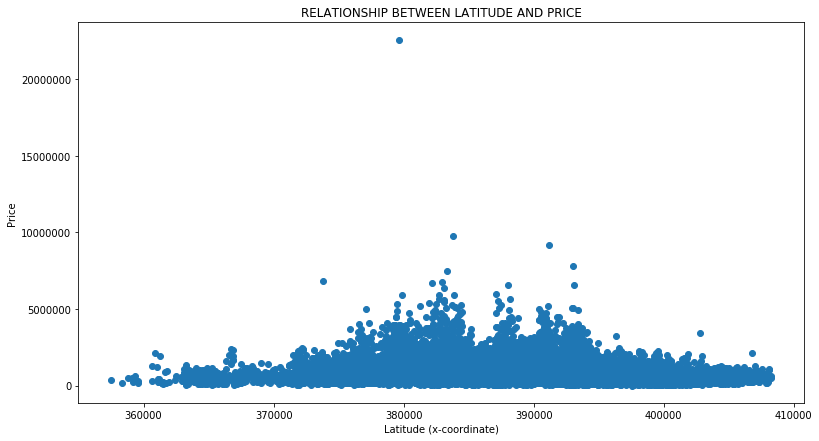

In [59]:
#PLOT LATITUDE vs. PRICE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['DIGXCORD'], model['CONSID_2019USD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("Latitude (x-coordinate)")
plt.ylabel("Price")
plt.title("RELATIONSHIP BETWEEN LATITUDE AND PRICE")
plt.ticklabel_format(style='plain')
plt.show()

## Homes around latitude 380,000 to 390,000 have the highest prices.

#  

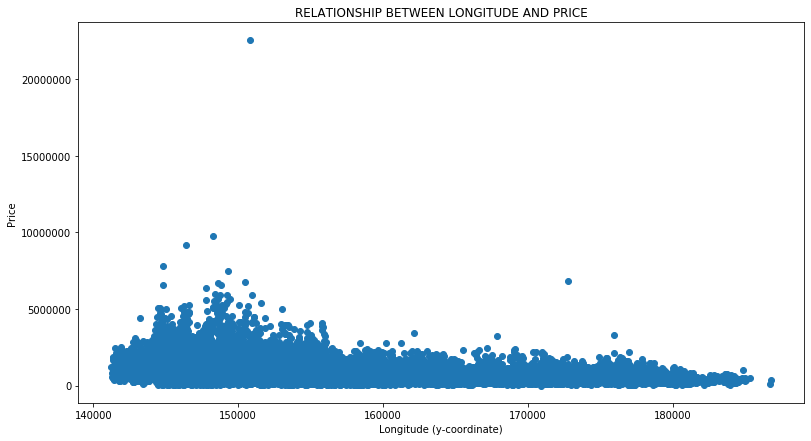

In [60]:
#PLOT LONGITUDE vs. PRICE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['DIGYCORD'], model['CONSID_2019USD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("Longitude (y-coordinate)")
plt.ylabel("Price")
plt.title("RELATIONSHIP BETWEEN LONGITUDE AND PRICE")
plt.ticklabel_format(style='plain')
plt.show()

## Homes around longitude 150,000 have a higher price.

#  

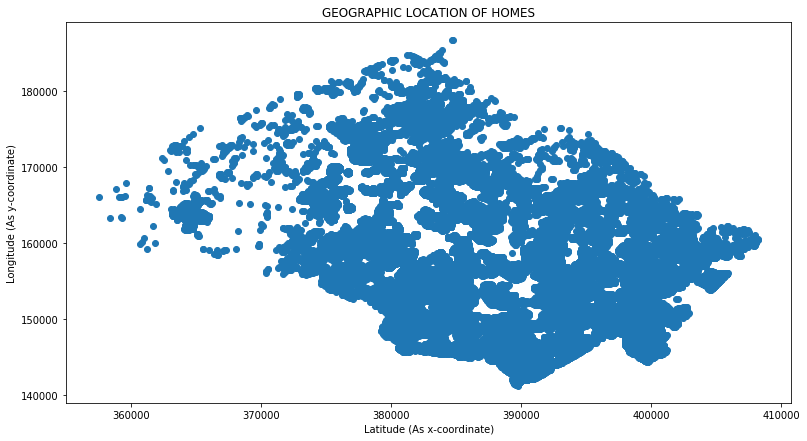

In [61]:
#PLOT LATITUDE vs.LONGITUDE
#fmt="${x:,.0f}"
#tick=mtick.StrMethodFormatter(fmt)
plt.figure(figsize=(13,7))
plt.scatter(model['DIGXCORD'], model['DIGYCORD'])
#plt.yaxis.set_major_formatter(tick)
plt.xlabel("Latitude (As x-coordinate)")
plt.ylabel("Longitude (As y-coordinate)")
plt.title("GEOGRAPHIC LOCATION OF HOMES")
plt.ticklabel_format(style='plain')
plt.show()

## Not suprisingly, the houses with the highest prices are in the affluent areas of the County (Chevy Chase, Bethesda, Potomac).

## CONCLUSION: The greatest determinant of a home price is: location, location, location...

#  